In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import geopandas as gpd
import numpy as np
import seaborn as sns
#https://getbootstrap.com/docs/4.0/components/alerts/

bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')


fig,ax = plt.subplots(figsize = (10,10))
bsas_map.plot(ax=ax)

In [4]:
df = pd.read_csv('coordinates_data.csv')

In [5]:
df.head() #primer vistazo

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,geometry,x,y,new_x,new_y,arrive_date,dayOfWeek
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,POINT (-58.44044719999999 -34.62069375),-58.440447,-34.620694,0.097696,0.084863,2021-02-28,6
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,POINT (-58.41828804463148 -34.58166840120946),-58.418288,-34.581668,0.119855,0.123889,2021-02-13,5
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,POINT (-58.20893257856369 -34.83109589037829),-58.208933,-34.831096,0.329210,-0.125539,2021-01-25,0
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,POINT (-58.454943113029 -34.56435426830171),-58.454943,-34.564354,0.083200,0.141203,2021-02-25,3
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,POINT (-58.45192389999999 -34.5592956),-58.451924,-34.559296,0.086219,0.146261,2020-09-17,3


In [6]:
df.shape 

(7406, 13)

In [7]:
df.columns #vistazo de columnas. se repiten algunas coosas no?

Index(['search_longitude', 'search_latitude', 'arrive', 'leave',
       'search_method', 'timestamp', 'geometry', 'x', 'y', 'new_x', 'new_y',
       'arrive_date', 'dayOfWeek'],
      dtype='object')

In [8]:
print(df.search_longitude.equals(df.x))
print(df.search_latitude.equals(df.y))

True
True


<p class="alert alert-block alert-info">
    eliminamos algunas columnas. fragmentemos el dataset para poder analizarlo  mejor </p>

In [9]:
data = df.drop(columns = [ 'geometry', 'x', 'y', 'new_x', 'new_y',])

In [10]:
data.head()

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,arrive_date,dayOfWeek
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,2021-02-28,6
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,2021-02-13,5
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,2021-01-25,0
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,2021-02-25,3
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,2020-09-17,3


<div class="alert alert-info" role="alert">
    <strong>pasemos la data temporal en datetime para poder plotear mejor</strong>
      <hr>
    <a href="https://strftime.org/">acá tenemos los posibles formatos de datetime</a>
</div>

In [11]:
dates_to_transform = ['arrive','leave']

In [12]:
data.arrive.head(1)  #año mes dia hora_ minuto : segundosss???

0    2021-02-28 15:56:00+00:00
Name: arrive, dtype: object

In [13]:
for i in ['arrive','leave']:
    data[i] = pd.to_datetime(data[i])

In [14]:
#data['timestamp'] = pd.to_datetime('timestamp') # da error

<div class="alert alert-danger" role="alert">
    <strong>el timestamp tiene un formato extremadamente raro, hay que chequear que onda porque ahí es donde está la información más rica</strong>
</div>

<hr>

<AxesSubplot:xlabel='leave', ylabel='Count'>

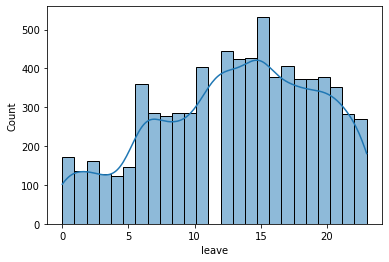

In [15]:
sns.histplot(data.leave.dt.hour, kde= True)

<AxesSubplot:xlabel='arrive', ylabel='Count'>

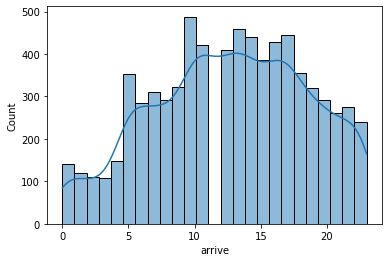

In [16]:
sns.histplot(data.arrive.dt.hour, kde= True)

In [17]:
data['arrive_hour'] = data.arrive.dt.hour

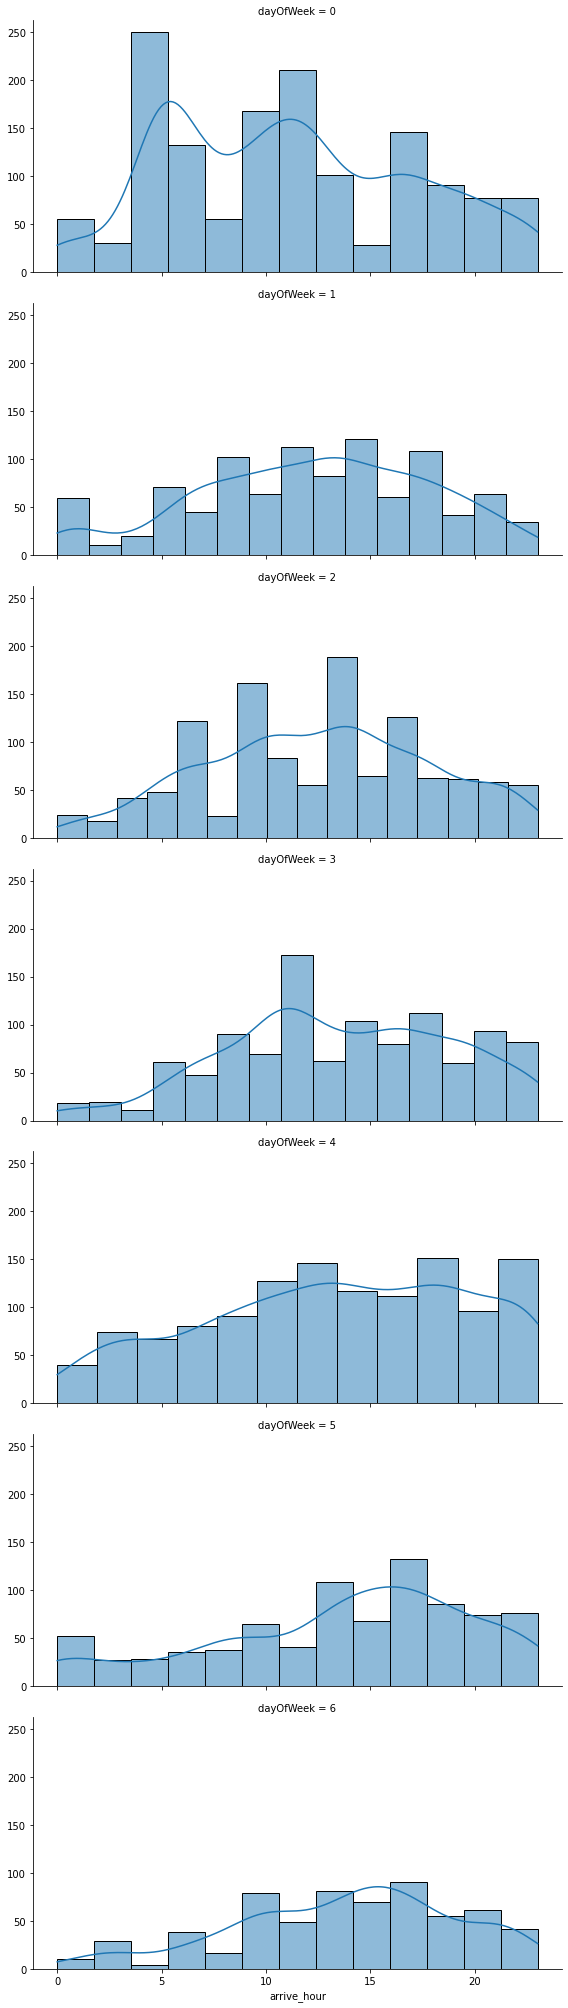

In [18]:
g = sns.FacetGrid(data, row="dayOfWeek", height=4, aspect=2)
g.map(sns.histplot, "arrive_hour", kde=True)

<div class="alert alert-danger" role="alert">
    hay que haces esto con el <strong>TIMESTAMP</strong>, el arrive hour no nos dice mucho
</div>

El timestamp es la hora a la cual la persona hizo la busqueda. Vos decis que nos da data? Quizas solo busco para ver que onda. Nos puede servir para comparar a ver si desde efectivamente se hace la reserva.

Esta es la misma transformacion que le hice al arrive y al leave (venian en ese formato feo que tiene el timestamp):

In [19]:
data.head()

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,arrive_date,dayOfWeek,arrive_hour
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,2021-02-28,6,15
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,2021-02-13,5,15
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,2021-01-25,0,17
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,2021-02-25,3,11
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,2020-09-17,3,10


In [39]:
data['timestamp'] = pd.to_datetime(data['timestamp'], utc=True, errors='coerce')
data['timestamp'].dtype

datetime64[ns, UTC]

In [40]:
data['timestamp'] = data.timestamp.dt.strftime("%Y-%m-%d %H:%M:%S")

In [45]:
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [46]:
data["search_hour"] = data["timestamp"].dt.hour
data

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,arrive_date,dayOfWeek,arrive_hour,search_hour
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31 22:35:42,2021-02-28,6,15,22.0
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13 15:13:03,2021-02-13,5,15,15.0
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25 17:45:44,2021-01-25,0,17,17.0
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25 11:22:32,2021-02-25,3,11,11.0
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17 05:13:03,2020-09-17,3,10,5.0
...,...,...,...,...,...,...,...,...,...,...
7401,-58.536259,-34.624580,2020-12-21 08:00:54.782000+00:00,2020-12-21 14:00:00+00:00,update_time_home,2020-12-21 07:57:42,2020-12-21,0,8,7.0
7402,-58.539242,-34.812266,2021-02-17 01:49:07.945000+00:00,2021-02-17 02:49:07.945000+00:00,google,2021-02-17 01:49:24,2021-02-17,2,1,1.0
7403,-58.512720,-34.469415,2020-11-17 09:00:00+00:00,2020-11-17 09:15:00+00:00,google,2020-11-17 06:32:01,2020-11-17,1,9,6.0
7404,-58.383415,-34.591915,2021-01-23 04:15:18.431000+00:00,2021-01-23 05:15:18.431000+00:00,this_area,2021-01-23 04:12:43,2021-01-23,5,4,4.0


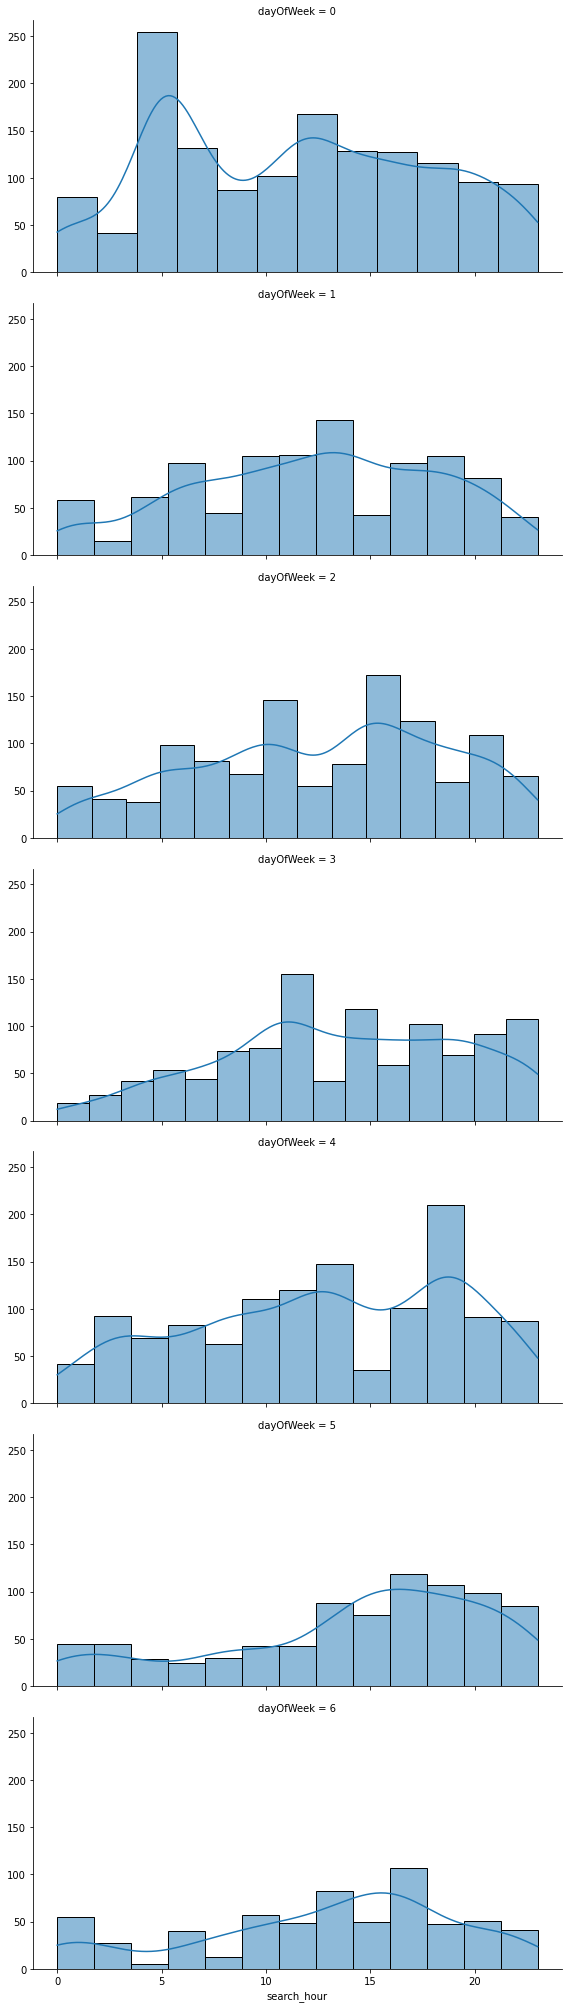

In [47]:
g = sns.FacetGrid(data, row="dayOfWeek", height=4, aspect=2)
g.map(sns.histplot, "search_hour", kde=True)